In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
import pandas as pd
df = pd.read_excel("Documents/Python/heart_disease.xlsx") 
print("Data Loaded. Shape:", df.shape)

Data Loaded. Shape: (908, 13)


In [7]:
# Rename for consistency
df.rename(columns={'sex': 'Gender'}, inplace=True)

# Handle 'TRUE'/'FALSE' strings
df['fbs'] = df['fbs'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})
df['exang'] = df['exang'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})

In [9]:
# Encode categorical variables
categorical_cols = ['Gender', 'cp', 'restecg', 'slope', 'thal']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Define X and y
X = df.drop(columns='num')
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

In [13]:
## Exploratory Data Analysis
# Basic info and statistics
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   Gender    908 non-null    int32  
 2   cp        908 non-null    int32  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int32  
 7   thalch    908 non-null    int64  
 8   exang     872 non-null    float64
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int32  
 11  thal      908 non-null    int32  
 12  num       908 non-null    int64  
dtypes: float64(2), int32(5), int64(6)
memory usage: 74.6 KB


None

,age,Gender,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,872.000000,846.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,0.386468,0.891253,1.155286,1.162996,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.487219,1.093875,0.691023,0.762891,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [35]:
df.isnull().sum()  # Check for null values


age          0
Gender       0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang       36
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

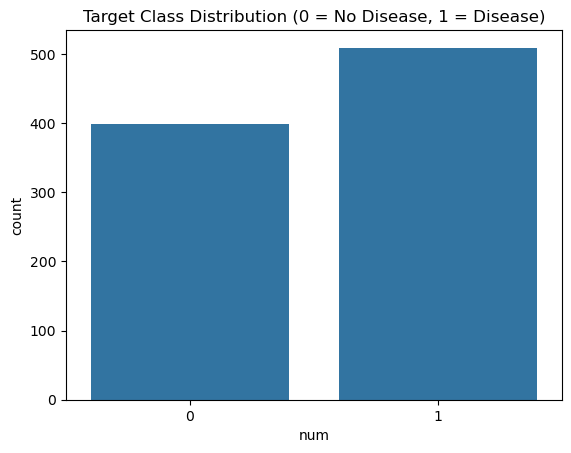

In [17]:
# Class distribution
sns.countplot(x=y)
plt.title("Target Class Distribution (0 = No Disease, 1 = Disease)")
plt.show()

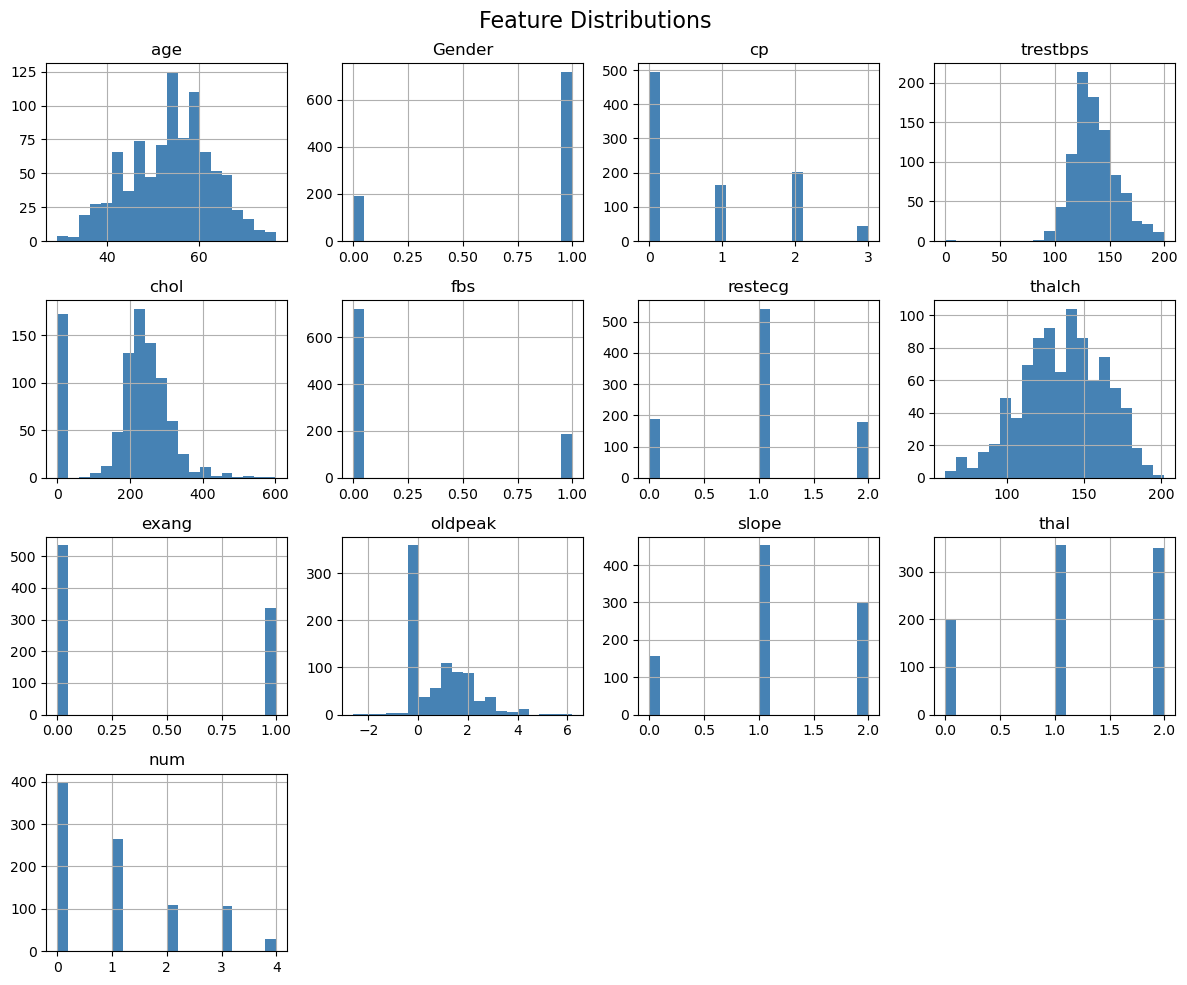

In [19]:
# Feature distributions
df.hist(figsize=(12, 10), bins=20, color='steelblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

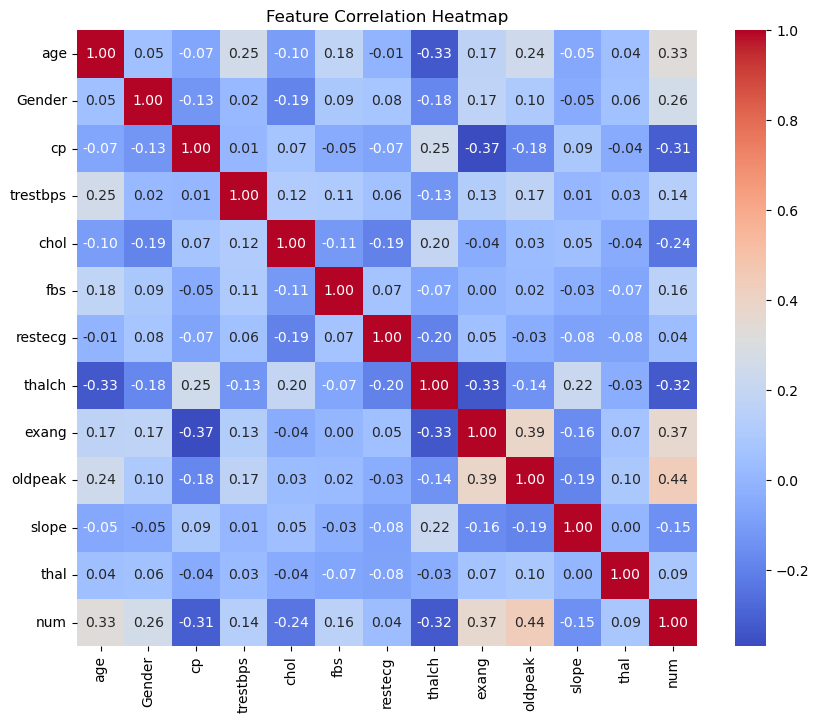

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        89
           1       0.71      0.62      0.66        93

    accuracy                           0.68       182
   macro avg       0.68      0.68      0.68       182
weighted avg       0.68      0.68      0.68       182

Accuracy Score: 0.6758241758241759
Confusion Matrix:
 [[65 24]
 [35 58]]


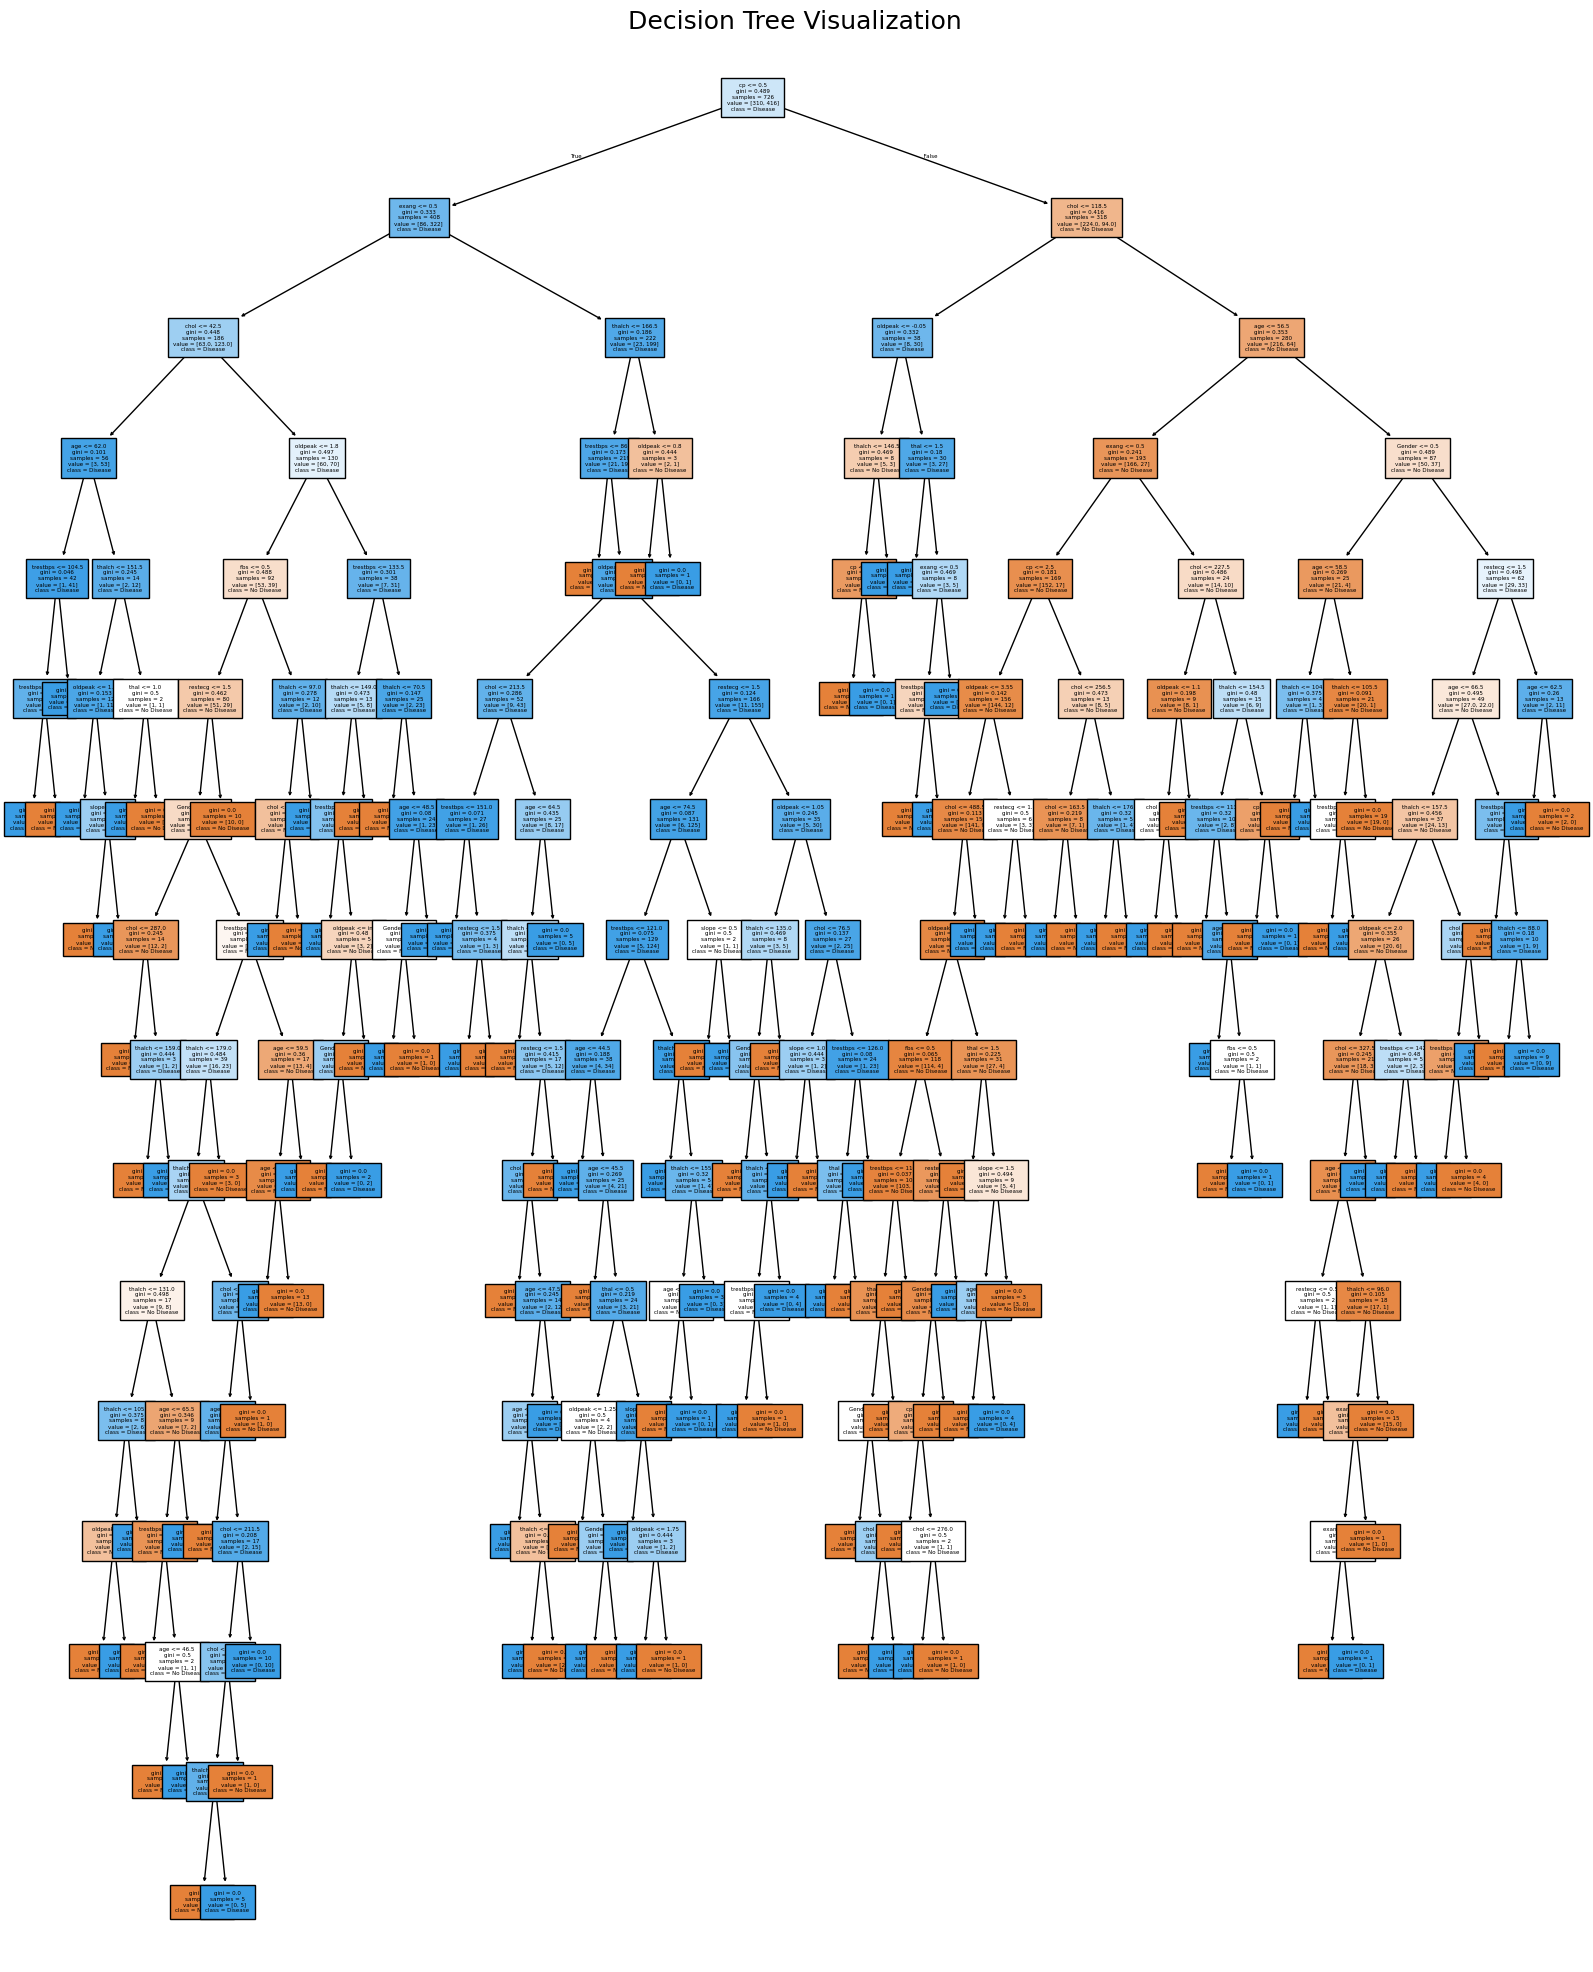

In [27]:
# Visualize
plt.figure(figsize=(20, 25))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    fontsize=4 
)
plt.title("Decision Tree Visualization", fontsize=18)  # Optional: larger title
plt.show()


## 1. What are some common hyperparameters of decision tree models, and how do they affect performance?
max_depth: Limits the depth of the tree to prevent overfitting.

min_samples_split: Minimum number of samples required to split a node.

criterion: Metric for splitting nodes (e.g., Gini impurity, entropy).

min_samples_leaf: Minimum samples required at a leaf node.

## 2. What is the difference between Label Encoding and One-Hot Encoding?
Label Encoding assigns a unique integer to each category. It introduces ordinal relationships.

One-Hot Encoding creates binary columns for each category to avoid ordinal assumptions.